<a href="https://colab.research.google.com/github/aslam7861/Machine_Learning_Project/blob/main/selecting_songs_1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

In [255]:
moosic=pd.read_csv('https://raw.githubusercontent.com/aslam7861/Machine_Learning_Project/main/df_audio_features_1000')

In [256]:
df=moosic
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [257]:
import numpy as np

In [258]:
# num_songs=20
# max_n_cluster=4
# features = ['danceability', 'acousticness']
def selective_songs(max_n_cluster, df, features, num_songs, distance):
    ciel_nums =num_songs#  int(np.ceil(num_songs/max_n_cluster))
    #df=df[features]
    df_f=df[features]
    df_norm=MinMaxScaler().fit_transform(df_f)
    kmeans=KMeans(n_clusters=4)
    kmeans.fit(df_norm)
    cl_pos= pd.DataFrame(kmeans.cluster_centers_)
    cl_pos.columns=df_f.columns
    df_f['cluster']=kmeans.labels_
    df['cluster']=kmeans.labels_
    cl_pos['cluster']= cl_pos.index
    dists=[]
    for i in range(df_f.shape[0]):
        cent = int(df_f.iloc[i]['cluster'])
        if distance == 'euclidean':
            dists.append(np.sqrt(  sum([a**2 for a in (df_f.iloc[i]-cl_pos.iloc[cent])] )))
        else:
            dists.append(np.sqrt(  sum([abs(a) for a in (df_f.iloc[i]-cl_pos.iloc[cent])] )))

    df_f['euc_dist']=dists
    df['euc_dist']=dists
    # songs=[]
    # for i in range(max_n_cluster):
    #     df_cluster=df.sort_values('euc_dist').groupby('cluster')
    #     songs.append(df_cluster[df_cluster['cluster']==i].head(num_songs) )
    songs=df.sort_values('euc_dist').groupby('cluster').head(ciel_nums)
    #songs = select_df[:num_songs]
    return songs, cl_pos

In [259]:
songs,cl_pos=selective_songs(4,moosic,['danceability', 'acousticness', 'energy'], 20, 'euclidean')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [260]:
songs

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,cluster,euc_dist
1393,"Symphony No. 6 in A Minor, ""Tragic"": I. Allegr...",Gustav Mahler,0.248,0.162,10,-18.968,1,0.0380,0.925,0.785000,0.0794,0.0775,124.654,NaN,1382387,4,0jRYO7vBGrMMyq0AZC2TkP,https://open.spotify.com/track/0jRYO7vBGrMMyq0...,0,0.018610
1196,LA CANCIÓN,J Balvin,0.754,0.646,7,-5.795,1,0.3170,0.152,0.000018,0.1080,0.4290,176.089,NaN,242573,4,0fea68AdmYNygeTGI4RC18,https://open.spotify.com/track/0fea68AdmYNygeT...,3,0.022164
346,The Middle,Zedd,0.753,0.657,7,-3.061,1,0.0449,0.171,0.000000,0.1120,0.4370,107.010,NaN,184732,4,09IStsImFySgyp0pIQdqAc,https://open.spotify.com/track/09IStsImFySgyp0...,3,0.022429
868,Blues Inn - Remastered,Jackie McLean,0.583,0.461,5,-9.580,0,0.0482,0.668,0.170000,0.1620,0.5160,131.878,NaN,545347,4,7Kwi4xmgY4qQwOhBe0zsbh,https://open.spotify.com/track/7Kwi4xmgY4qQwOh...,2,0.024904
1202,Traicionera,Sebastian Yatra,0.775,0.679,11,-4.985,1,0.0465,0.147,0.000000,0.1550,0.6740,91.000,NaN,229387,4,4Ft0391aLVNtCPPseh98lp,https://open.spotify.com/track/4Ft0391aLVNtCPP...,3,0.026799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,Alone Together,Peggy Lee,0.589,0.386,5,-8.013,0,0.0441,0.750,0.000000,0.1500,0.5180,142.371,NaN,127800,4,47xU4Sm1RWZgRgugWPFxzz,https://open.spotify.com/track/47xU4Sm1RWZgRgu...,2,0.095605
120,Venus - Bonus Track,Frankie Avalon,0.526,0.488,10,-12.645,1,0.0296,0.601,0.000013,0.0940,0.7180,115.194,NaN,141987,4,0qDShcc7oY6M8OFaDXHOZG,https://open.spotify.com/track/0qDShcc7oY6M8OF...,2,0.098455
878,Two Not One,Lee Konitz,0.624,0.383,8,-10.561,1,0.0633,0.627,0.000005,0.0963,0.6740,117.526,NaN,331267,4,3bYBPyLGsa1unDrVaNzN4y,https://open.spotify.com/track/3bYBPyLGsa1unDr...,2,0.103943
284,A Horse with No Name,America,0.654,0.506,11,-17.180,0,0.0535,0.686,0.015500,0.1550,0.8310,123.179,NaN,252240,4,54eZmuggBFJbV7k248bTTt,https://open.spotify.com/track/54eZmuggBFJbV7k...,2,0.104580


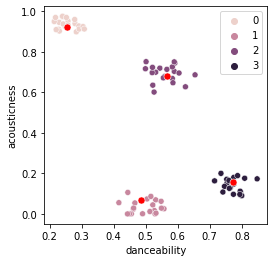

In [261]:
fig, ax=plt.subplots(figsize=(4,4))
sns.scatterplot(data=songs, x='danceability', y='acousticness', hue='cluster')
sns.scatterplot(data=cl_pos, x='danceability', y='acousticness',color='red', s=50)


Text(0.5, 0, 'energy')

<Figure size 432x288 with 0 Axes>

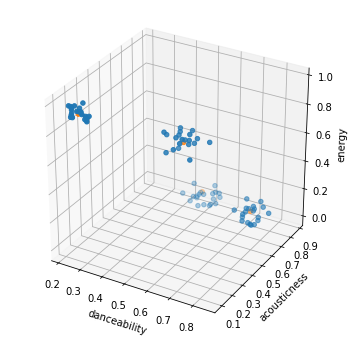

In [262]:
fig = plt.figure()
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')
# ax.set_xlim(0, 0.8)
# ax.set_ylim(0, 0.8)
# ax.set_zlim(0, 0.8)

d=songs
ax.scatter(d['danceability'],d['energy'], d['acousticness'])
ax.scatter(cl_pos['danceability'], cl_pos['energy'], cl_pos['acousticness'])

ax.set_xlabel('danceability')
ax.set_ylabel('acousticness')
ax.set_zlabel('energy')

In [274]:
cols=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']


In [275]:
data_set_1000=moosic[cols]

In [277]:
data_set_1000.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,117080
1,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,223760
2,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,157293


In [279]:

from math import pi

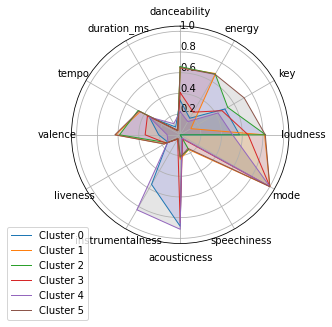

In [280]:
peng_cl_norm = MinMaxScaler().fit_transform(data_set_1000)
# Based on the quick look to the scatter plot, 
# we are going to assume there can be 3 different species.
kmeans = KMeans(n_clusters=6)
kmeans.fit(peng_cl_norm)

kmeans.cluster_centers_

cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
#cl_pos.columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo']
#cl_pos.columns = ['danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']
cl_pos
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind4
values=radar_df.loc[3].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 3")
ax.fill(angles, values, 'yellow', alpha=0.1)

# Ind5
values=radar_df.loc[4].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 4")
ax.fill(angles, values, 'black', alpha=0.1)
# Ind6
values=radar_df.loc[5].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 5")
ax.fill(angles, values, 'black', alpha=0.1)

# Ind7
#values=radar_df.loc[6].drop('cluster').values.flatten().tolist()
#values += values[:1]
#ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 6")
#ax.fill(angles, values, 'cyan', alpha=0.1)
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()